In [23]:
import numpy as np
import pandas as pd
from spec_id import Median_w_Error, Median_w_Error_cont,Gen_spec
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
from vtl.Readfile import Readfile
from glob import glob
from astropy.io import fits, ascii
from astropy.table import Table
from scipy.interpolate import interp1d
import seaborn as sea
sea.set(style='white')
sea.set(style='ticks')
sea.set_style({"xtick.direction": "in","ytick.direction": "in"})
colmap = sea.cubehelix_palette(12, start=2, rot=.2, dark=0, light=1.1, as_cmap=True)

In [3]:
galDB = pd.read_pickle('../data/upd_galDB.pkl')
metal=np.round(np.arange(0.002,0.031,0.001),3)
age=np.round(np.arange(.5,6.1,.1),1)
tau=[0,8.0, 8.3, 8.48, 8.6, 8.7, 8.78, 8.85, 8.9, 8.95, 9.0, 9.04, 9.08, 9.11, 9.15, 9.18, 9.2, 9.23, 9.26, 9.28,
     9.3, 9.32, 9.34, 9.36, 9.38, 9.4, 9.41, 9.43, 9.45, 9.46, 9.48]
M,A=np.meshgrid(metal,age)

In [6]:
# galDB['Z'] = np.zeros(len(galDB.index))
# galDB['Z_l'] = np.zeros(len(galDB.index))
# galDB['Z_h'] = np.zeros(len(galDB.index))
# galDB['Zx'] = np.zeros(len(galDB.index))
# galDB['Zx_l'] = np.zeros(len(galDB.index))
# galDB['Zx_h'] = np.zeros(len(galDB.index))

# galDB['t'] = np.zeros(len(galDB.index))
# galDB['t_l'] = np.zeros(len(galDB.index))
# galDB['t_h'] = np.zeros(len(galDB.index))
# galDB['tx'] = np.zeros(len(galDB.index))
# galDB['tx_l'] = np.zeros(len(galDB.index))
# galDB['tx_h'] = np.zeros(len(galDB.index))

# galDB['tau'] = np.zeros(len(galDB.index))
# galDB['tau_l'] = np.zeros(len(galDB.index))
# galDB['tau_h'] = np.zeros(len(galDB.index))
# galDB['taux'] = np.zeros(len(galDB.index))
# galDB['taux_l'] = np.zeros(len(galDB.index))
# galDB['taux_h'] = np.zeros(len(galDB.index))

# galDB['d'] = np.zeros(len(galDB.index))
# galDB['d_l'] = np.zeros(len(galDB.index))
# galDB['d_h'] = np.zeros(len(galDB.index))
# galDB['dx'] = np.zeros(len(galDB.index))
# galDB['dx_l'] = np.zeros(len(galDB.index))
# galDB['dx_h'] = np.zeros(len(galDB.index))

In [22]:
# galDB.to_pickle('../data/upd_galDB.pkl')

In [28]:
d,prd = np.load('../data/dust_prior.npy')

np.trapz(prd,d)

1.0

/Users/vestrada/miniconda3/envs/astroconda/lib/python3.5/site-packages/grizli-0.6.0_115_g3ce5ccf-py3.5-macosx-10.6-x86_64.egg/grizli/model.py:3422: RuntimeWarning: invalid value encountered in sqrt
  resid = np.abs(self.scif - self.flat_flam)*np.sqrt(self.ivarf)
/Users/vestrada/miniconda3/envs/astroconda/lib/python3.5/site-packages/grizli-0.6.0_115_g3ce5ccf-py3.5-macosx-10.6-x86_64.egg/grizli/model.py:3427: RuntimeWarning: invalid value encountered in sqrt
  contam_mask = ((self.contam*np.sqrt(self.ivar) > contam_sn_mask[0]) &
/Users/vestrada/miniconda3/envs/astroconda/lib/python3.5/site-packages/grizli-0.6.0_115_g3ce5ccf-py3.5-macosx-10.6-x86_64.egg/grizli/model.py:3428: RuntimeWarning: invalid value encountered in sqrt
  (self.model*np.sqrt(self.ivar) < contam_sn_mask[1]))
/Users/vestrada/miniconda3/envs/astroconda/lib/python3.5/site-packages/grizli-0.6.0_115_g3ce5ccf-py3.5-macosx-10.6-x86_64.egg/grizli/model.py:544: RuntimeWarning: divide by zero encountered in true_divide
  self.op

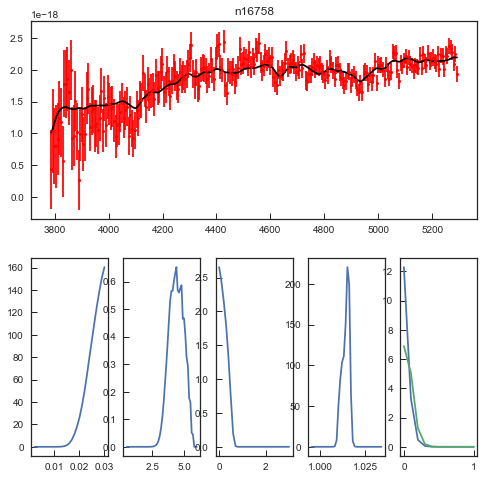

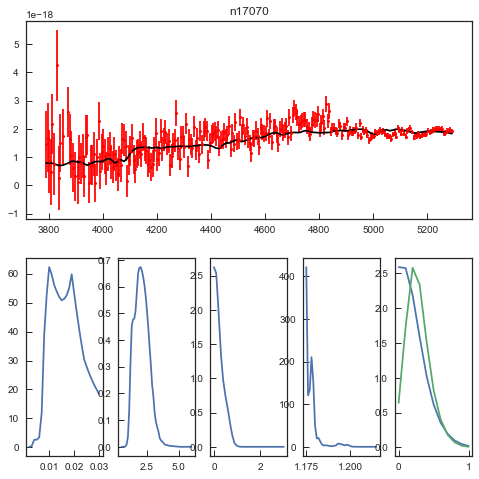

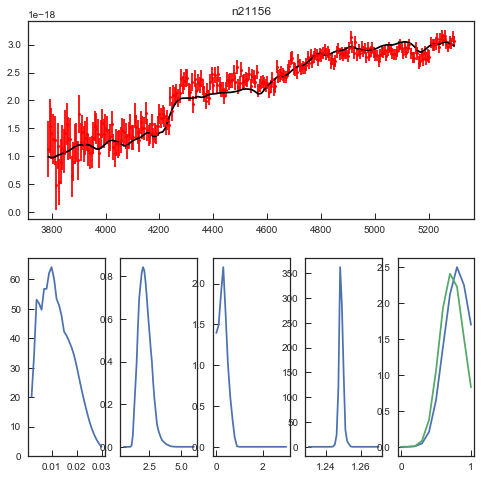

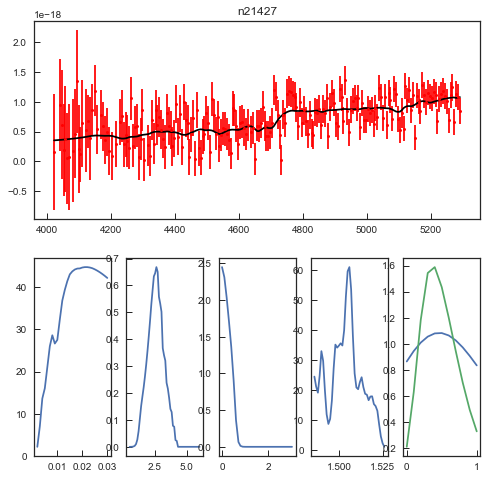

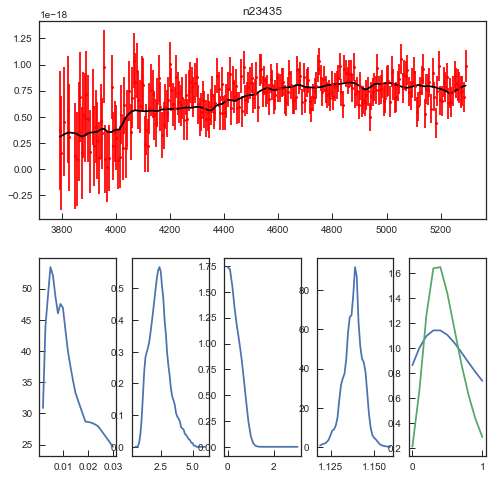

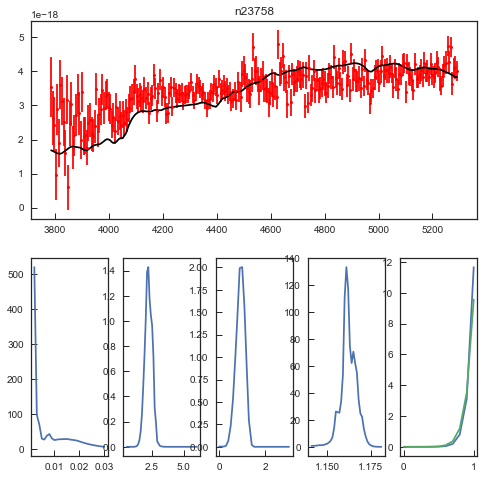

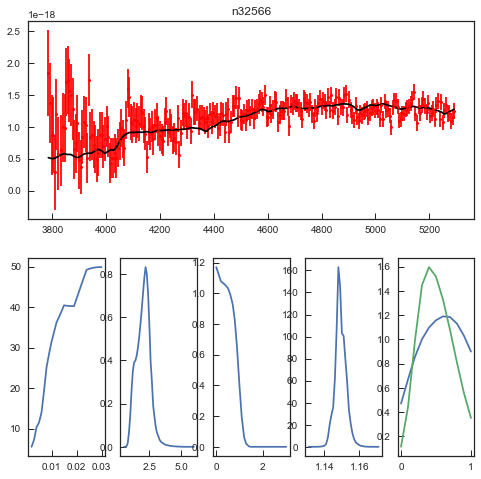

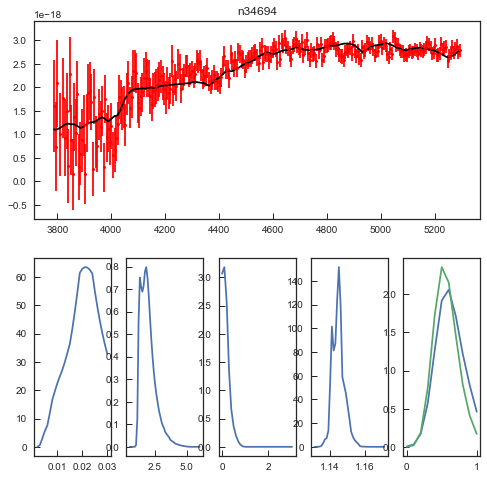

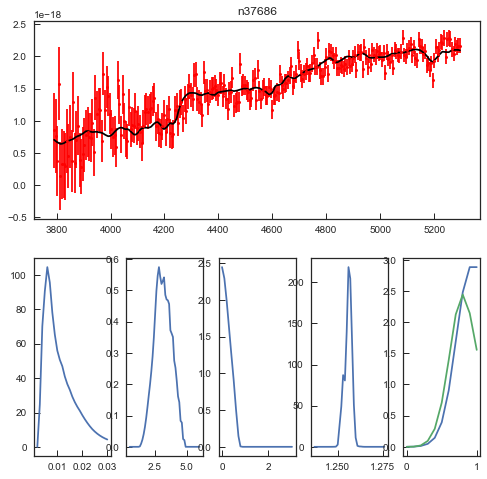

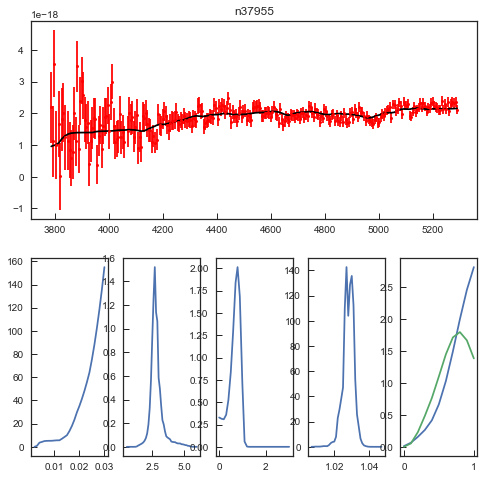

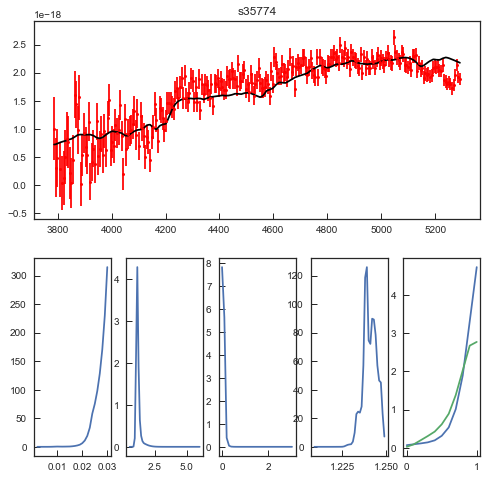

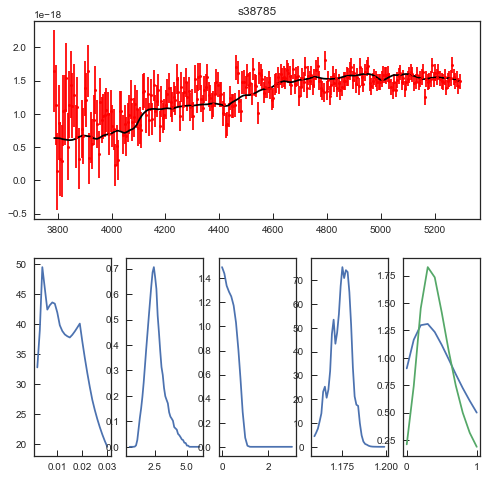

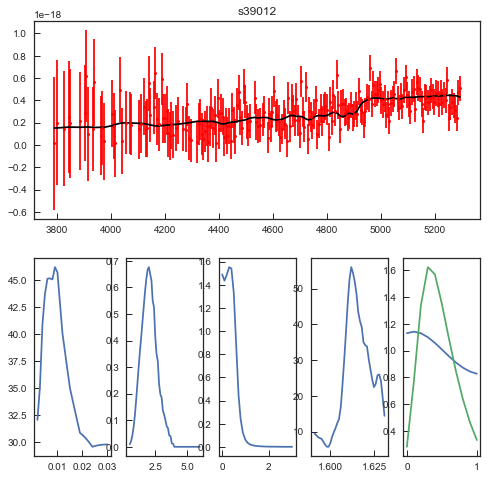

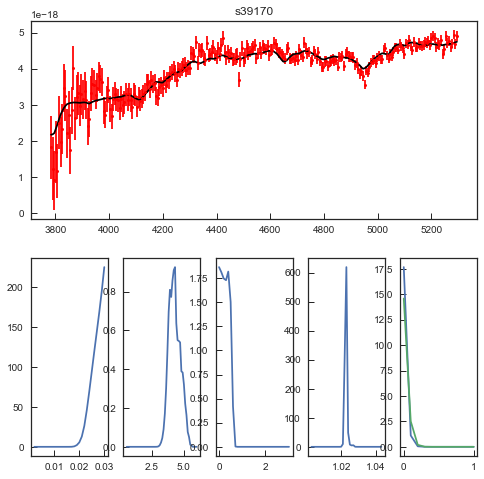

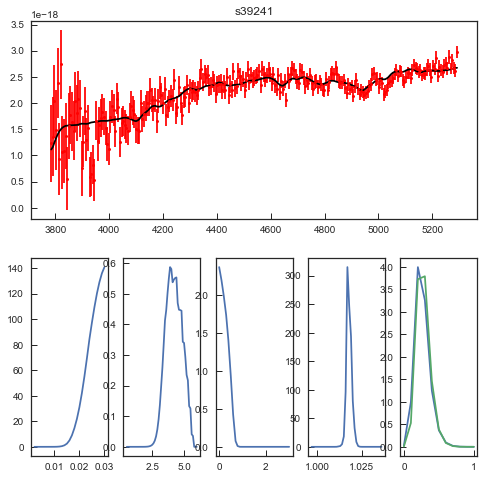

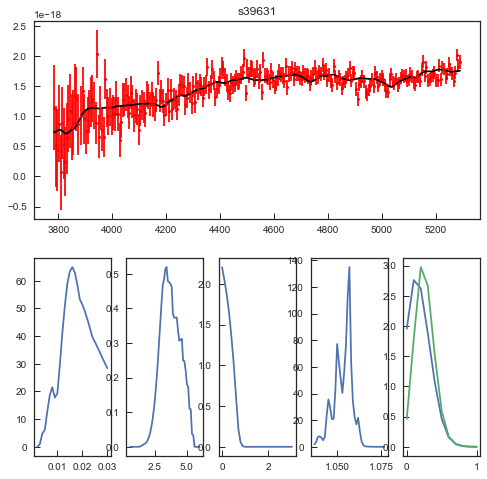

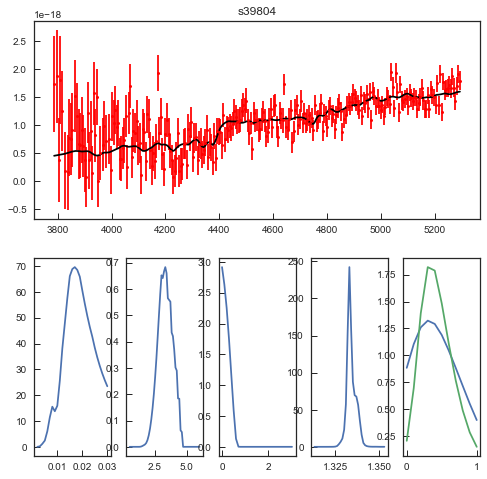

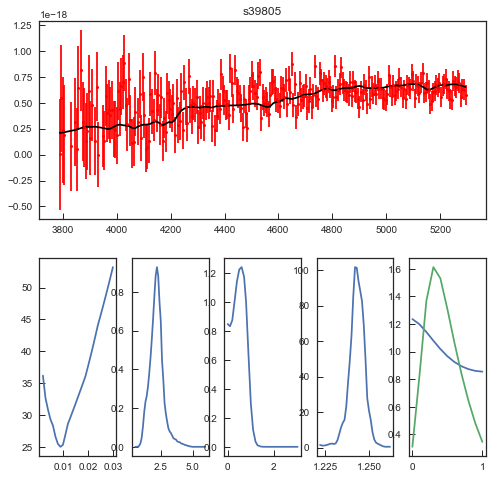

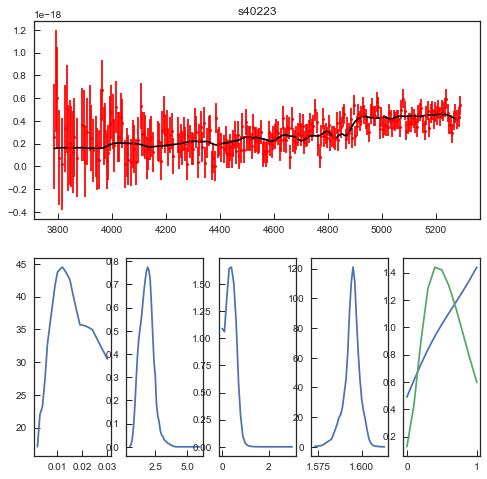

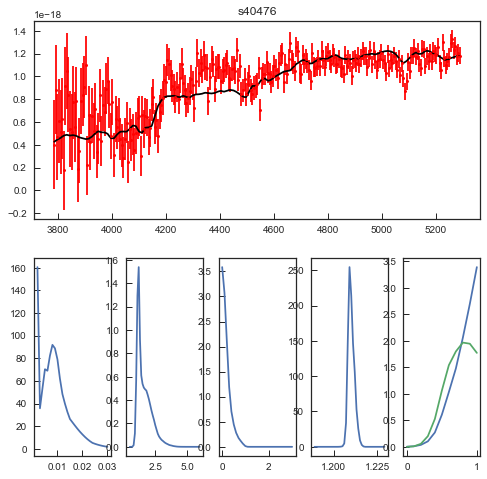

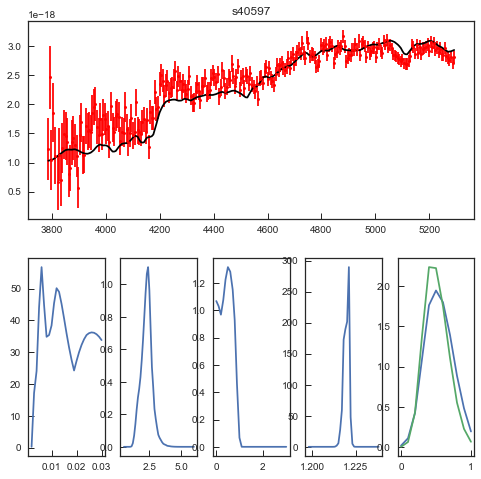

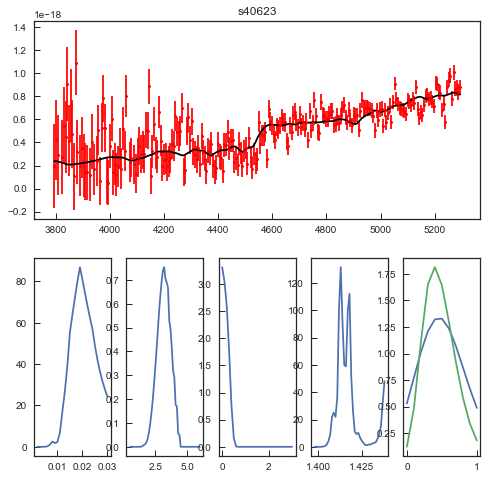

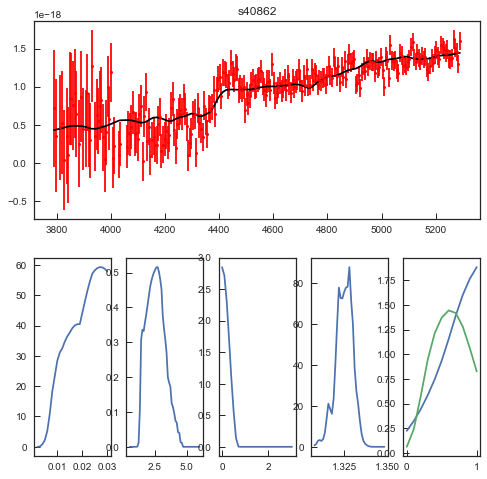

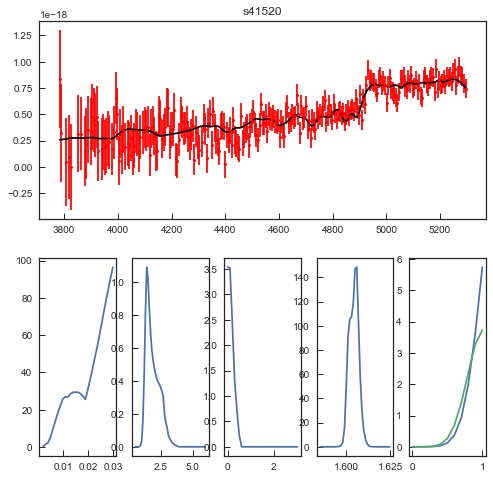

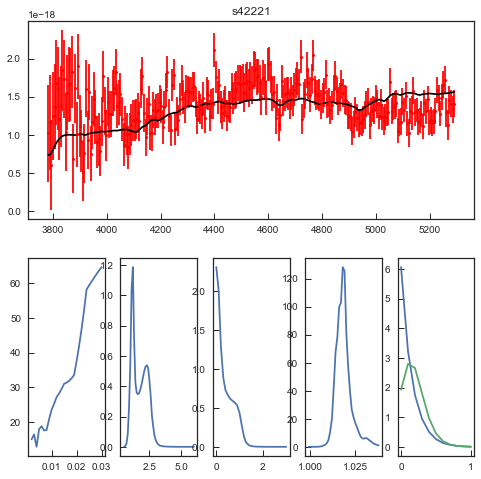

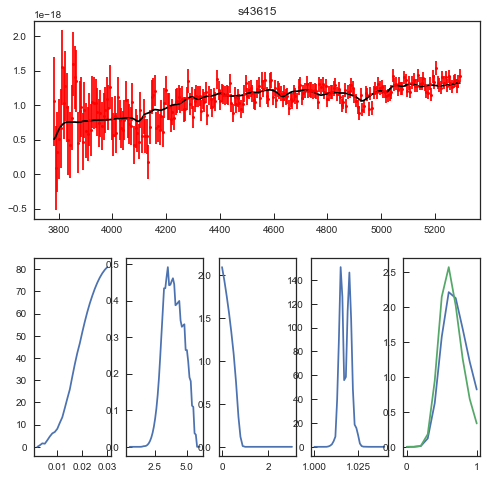

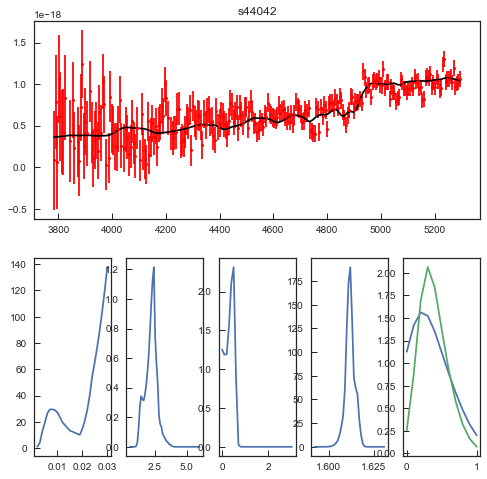

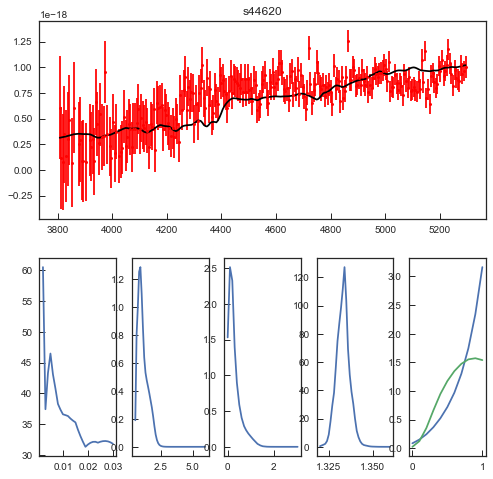

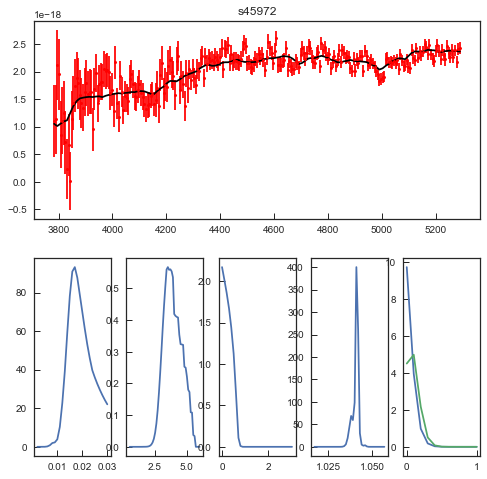

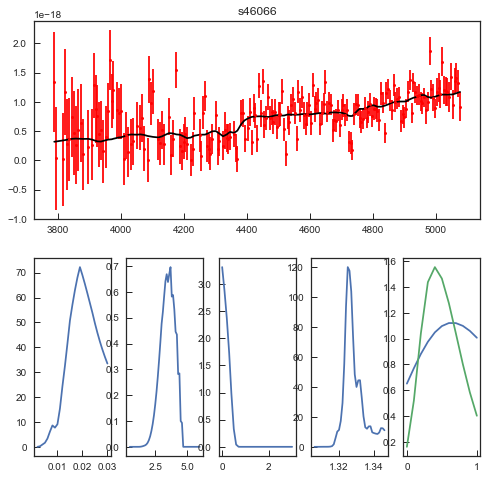

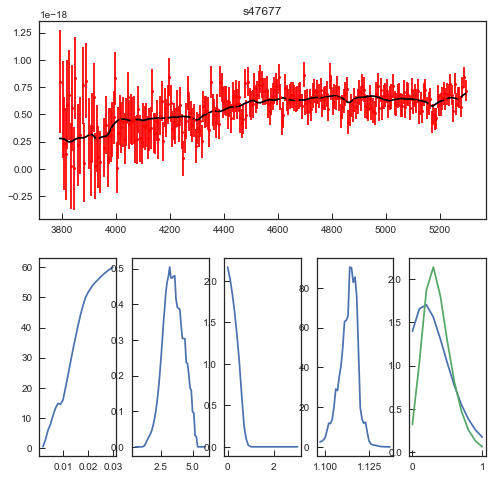

In [29]:
gs = GridSpec(2,5)
for i in galDB.index:
    Z,PZ = np.load('../chidat/{0}_full_fit_Z_pos.npy'.format(galDB.gids[i]))
    t,Pt = np.load('../chidat/{0}_full_fit_t_pos.npy'.format(galDB.gids[i]))
    ult,Ptau = np.load('../chidat/{0}_full_fit_tau_pos.npy'.format(galDB.gids[i]))
    z,Pz = np.load('../chidat/{0}_full_fit_rs_pos.npy'.format(galDB.gids[i]))
    d,Pd = np.load('../chidat/{0}_full_fit_d_pos.npy'.format(galDB.gids[i]))
    
#     medZ,mler,mher = Median_w_Error_cont(PZ,Z)
#     galDB['Zx'][i] = medZ
#     galDB['Zx_l'][i] = mler
#     galDB['Zx_h'][i] = mher
    
#     medZ,mler,mher = Median_w_Error(PZ,Z)
#     galDB['Z'][i] = medZ
#     galDB['Z_l'][i] = mler
#     galDB['Z_h'][i] = mher
    
#     medt,mler,mher = Median_w_Error_cont(Pt,t)
#     galDB['tx'][i] = medt
#     galDB['tx_l'][i] = mler
#     galDB['tx_h'][i] = mher
    
#     medt,mler,mher = Median_w_Error(Pt,t)
#     galDB['t'][i] = medt
#     galDB['t_l'][i] = mler
#     galDB['t_h'][i] = mher
    
#     medtau,mler,mher = Median_w_Error_cont(Ptau,ult)
#     galDB['taux'][i] = medtau
#     galDB['taux_l'][i] = mler
#     galDB['taux_h'][i] = mher
    
#     medtau,mler,mher = Median_w_Error(Ptau,ult)
#     galDB['tau'][i] = medtau
#     galDB['tau_l'][i] = mler
#     galDB['tau_h'][i] = mher
    
#     medd,mler,mher = Median_w_Error_cont(Pd,d)
#     galDB['dx'][i] = medd
#     galDB['dx_l'][i] = mler
#     galDB['dx_h'][i] = mher
    
#     medd,mler,mher = Median_w_Error(Pd,d)
#     galDB['d'][i] = medd
#     galDB['d_l'][i] = mler
#     galDB['d_h'][i] = mher
    
#     galDB['z_grism'][i] = z[Pz == max(Pz)][0]
    
    sp = Gen_spec(galDB.gids[i],medz,minwv=8000,maxwv=11200)
    sp.Fit_lwa(medZ,medt,z[Pz == max(Pz)][0],medd,metal,age,tau)

   
    plt.figure(figsize=[8,8])
    plt.subplot(gs[0,:])
    plt.errorbar(sp.gal_wv_rf,sp.gal_fl, sp.gal_er,linestyle='None', marker='o', markersize=3, color='r')
    plt.plot(sp.gal_wv_rf,sp.fl,'k')
    plt.title(galDB.gids[i])
    
    plt.subplot(gs[1,0])
    plt.plot(Z,PZ)
    plt.subplot(gs[1,1])
    plt.plot(t,Pt)
    plt.subplot(gs[1,2])
    plt.plot(ult,Ptau)
    plt.subplot(gs[1,3])
    plt.plot(z,Pz)
    plt.subplot(gs[1,4])
    plt.plot(d,Pd)
    plt.plot(d,(Pd*prd)/np.trapz(Pd*prd,d))

In [9]:
galDB

,bfZ,bfd,bft,bftau,bfz,gids
0,0.025,0.6,4.5,8.90,1.221,s40597
1,0.009,1.0,1.1,0.00,1.209,s40476
2,0.019,0.2,1.9,0.00,1.175,s38785
3,0.021,1.0,1.4,0.00,1.328,s40862
4,0.025,1.0,5.3,9.04,1.595,s40223
5,0.030,0.0,1.3,0.00,1.242,s39805
6,0.030,0.8,0.8,8.00,1.334,s44620
7,0.008,0.2,6.0,0.00,1.057,s39631
8,0.030,0.9,1.9,8.30,1.605,s41520
9,0.019,0.8,2.4,8.48,1.248,n21156


In [13]:
fast_s=Table.read('/Users/vestrada/Desktop/catalogs_for_CLEAR/goodss_3dhst.v4.1.cats/Fast/goodss_3dhst.v4.1.fout',format='ascii').to_pandas()
fast_n=Table.read('/Users/vestrada/Desktop/catalogs_for_CLEAR/goodsn_3dhst.v4.1.cats/Fast/goodsn_3dhst.v4.1.fout',format='ascii').to_pandas()


In [14]:
galDB['l_mass'] = np.zeros(len(galDB.index))


In [20]:
for i in galDB.index:
    if galDB.gids[i][0]== 's':
        galDB['l_mass'][i] = fast_s['lmass'][int(galDB.gids[i][1:]) - 1]
        
    if galDB.gids[i][0]== 'n':
        galDB['l_mass'][i] = fast_n['lmass'][int(galDB.gids[i][1:]) - 1]

/Users/vestrada/miniconda3/envs/astroconda/lib/python3.5/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/vestrada/miniconda3/envs/astroconda/lib/python3.5/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [21]:
galDB

,gids,z_grism,z_grism_+,z_grism_-,Z,Z_l,Z_h,Zx,Zx_l,Zx_h,...,taux,taux_l,taux_h,d,d_l,d_h,dx,dx_l,dx_h,l_mass
0,n16758,1.015,0.003,0.004,0.027,0.004,0.002,0.026465,0.003872,0.002525,...,0.211820,0.145248,0.193664,0.1,0.086,0.020,0.050100,0.036072,0.070140,10.83
1,n17070,1.175,0.008,0.023,0.017,0.007,0.006,0.016533,0.006228,0.006958,...,0.211820,0.145248,0.272340,0.3,0.238,0.125,0.202405,0.140281,0.222445,10.92
2,n21156,1.248,0.003,0.004,0.012,0.006,0.007,0.011539,0.005780,0.007856,...,0.296548,0.181560,0.205768,0.8,0.199,0.118,0.773547,0.172345,0.144289,11.16
3,n21427,1.506,0.081,0.076,0.019,0.009,0.007,0.018665,0.008417,0.007631,...,0.223924,0.151300,0.211820,0.5,0.328,0.324,0.494990,0.322645,0.328657,10.73
4,n23435,1.139,0.012,0.012,0.013,0.008,0.011,0.012886,0.007407,0.011054,...,0.314704,0.217872,0.326808,0.5,0.334,0.304,0.466934,0.300601,0.336673,10.27
5,n23758,1.161,0.006,0.008,0.007,0.005,0.012,0.006994,0.004601,0.011615,...,0.938061,0.211820,0.187612,1.0,0.136,-0.014,0.947896,0.084168,0.038076,10.97
6,n32566,1.148,0.006,0.006,0.020,0.009,0.007,0.019563,0.008754,0.007238,...,0.459953,0.314704,0.357068,0.6,0.370,0.242,0.549098,0.318637,0.292585,10.61
7,n34694,1.145,0.006,0.007,0.021,0.008,0.005,0.020405,0.007182,0.005667,...,0.163404,0.108936,0.175508,0.7,0.285,0.106,0.601202,0.186373,0.204409,10.94
8,n37686,1.256,0.003,0.003,0.010,0.005,0.007,0.009070,0.003816,0.008136,...,0.229976,0.157352,0.229976,0.9,0.249,0.046,0.823647,0.172345,0.122244,10.89
9,n37955,1.027,0.005,0.008,0.026,0.006,0.003,0.025792,0.006172,0.003142,...,0.720189,0.284444,0.181560,0.8,0.255,0.142,0.793587,0.248497,0.148297,10.85
